In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split

Predict 1 if the tweet is describing a genuine disaster.

### Loading data

In [2]:
data = pd.read_csv('./nlp-getting-started/train.csv', encoding='utf-8')

In [3]:
data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

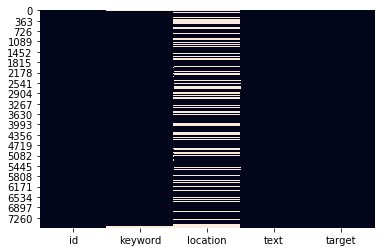

In [4]:
sns.heatmap(data.isnull(), cbar=False)
data.isna().sum()

### EDA

In [5]:
data.loc[data.target == 1].sample(10)

,id,keyword,location,text,target
3305,4736,evacuate,Sevier County.,So all the store's fire alarms went off today ...,1
2162,3102,deaths,Top secret bunker,@MayorofLondon pls reduce cyclist deaths with ...,1
3784,5375,fire%20truck,SouthEast Asia,Former Township fire truck being used in Phili...,1
5244,7498,oil%20spill,NaN,Refugio oil spill may have been costlier bigge...,1
7305,10455,wild%20fires,"North Carolina, USA",@Jennife29916207 I was thinking about you toda...,1
3562,5092,famine,NaN,Bolshevik government monopolized food supply t...,1
4361,6196,hijacker,NaN,Governor Allows Parole for School Bus Hijacker...,1
7242,10371,weapons,"Hawthorne, NE",PM Abe pledged to make every effort to seek a ...,1
6431,9197,suicide%20bombing,England,Suicide bombing for Da'esh is (rightly) despic...,1
2941,4227,drowned,Halfrica,So I pick myself off the ground and swam befor...,1


In [6]:
data.loc[data.target == 0].sample(10)

,id,keyword,location,text,target
5532,7891,quarantined,"Poplar, London",can't DL a patch to fix the error in symantec ...,0
5915,8446,screamed,NaN,someone's gonna get screamed at for getting th...,0
208,294,ambulance,"Davidson, NC",People who try to j-walk while an ambulance is...,0
6213,8864,smoke,NaN,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0
5333,7612,pandemonium,"VONT ISLAND, LAGOS",Pandemonium In Aba As Woman Delivers Baby With...,0
1453,2096,casualty,Hartford London Hong Kong,Conning Builds Strong Case for Portfolio #Dive...,0
4568,6494,injuries,Scottsdale. AZ,Next Man Up---AH SCREW THIS! I'm so tired of i...,0
657,951,blaze,Rio de Janeiro,I liked a @YouTube video from @iamrrsb http://...,0
1584,2286,cliff%20fall,NaN,@SZMNextDoor I got this cute lil cliff you can...,0
6957,9982,tsunami,Land Of The Kings,@tsunami_esh ?? hey Esh,0


In [18]:
class Twitter_Feature_Extractor():

    def __init__(self): 
        pass
    
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        self.sid = SentimentIntensityAnalyzer()
        
        from nltk import SnowballStemmer
        self.s_stem = SnowballStemmer(language='english')

        import spacy
        self.nlp = spacy.load('en_core_web_sm')
    
    def read_data(self, filepath):
        import pandas as pd
        self.data = pd.read_csv(filepath, encoding='utf-8')
        
    def extract_features(self):
        self.data['n_hash'] = self.data.text.apply(lambda x: self.hashtag_flag(x))
        self.data['n_at'] = self.data.text.apply(lambda x: self.at_flag(x))
        
        self.data['has_kw'] = self.data.keyword.apply(lambda x: 1 if isinstance(x, str) else 0)
        self.data['has_loc'] = self.data.location.apply(lambda x: 1 if isinstance(x, str) else 0)
        
        # Calculate length of the text string
        self.data['text_len'] = self.data.text.apply(lambda x: len(x))
        
        self.data['sentiment'] = self.data.text.apply(lambda x: self.sentiment_detect(x))
        
    def extract_pos(self): 
        token_df = pd.DataFrame([self.token_parse(t) for t in self.data.text.to_list()], columns=['nouns', 'verbs', 'adps', 'puncts', 'spaces', 'dets', 'advs', 'auxs', 'entities', 'sents', 'n_nchunks'])
        return pd.concat([self.data, token_df], axis=1, sort=False)
        
    def hashtag_flag(self, text): 
        ht_pattern = r'\#\w+'
        hashtags = re.findall(ht_pattern, text)
        return(len(hashtags))

    def at_flag(self, text):
        import re
        at_pattern = r'\@\w+'
        ats = re.findall(at_pattern, text)
        return(len(ats))
    
        
    ####################################
        
    def sentiment_detect(self, s): 
        str_stem = self.s_stem.stem(s)
        str_lem = self.nlp(str_stem)

#         a = self.sid.polarity_scores(s)['compound']
#         b = 
        return self.sid.polarity_scores(str_stem)['compound']
#         c = sid.polarity_scores(str_lem)['compound']

#         print((a,b))


    def token_parse(self, s):
    #     s_stem = SnowballStemmer(language='english')
        str_stem = self.s_stem.stem(s)
        str_lem = self.nlp(str_stem)

        pos_list = [token.pos_ for token in str_lem]
        pos_freq = dict(zip(pos_list,[pos_list.count(i) for i in pos_list]))

        for p in ['NOUN', 'VERB', 'ADP', 'PUNCT', 'SPACE', 'DET', 'ADV', 'AUX']:
            if p not in pos_freq: 
                pos_freq[p] = 0

        n_ents = len(list(str_lem.ents))

        n_sents = len(list(str_lem.sents))

        n_nchunk = len(list(str_lem.noun_chunks))

        return(pos_freq['NOUN'], pos_freq['VERB'], pos_freq['ADP'], pos_freq['PUNCT'], pos_freq['SPACE'], pos_freq['DET'], pos_freq['ADV'], pos_freq['AUX'], n_ents, n_sents, n_nchunk)#, sentiment)

    def topic_parser(self): 
        from sklearn.feature_extraction.text import CountVectorizer
        from sklearn.decomposition import LatentDirichletAllocation

        # Discard words that appear in 90% of the documents. Word has to appear in at least 2 documents
        cv = CountVectorizer(max_df=0.9, min_df=2, stop_words="english") 
        dtm = cv.fit_transform(self.data.text)
        lda = LatentDirichletAllocation(random_state=42, n_components = 7)
        print("Fitting LDA model. This may take several minutes")
        lda.fit(dtm)

        print("Fitting complete. Extracting results")
        topic_results = lda.transform(dtm)

        return(topic_results.argmax(axis=1))

In [19]:
tfe = Twitter_Feature_Extractor()
tfe.read_data('./nlp-getting-started/train.csv')
tfe.extract_features()

In [20]:
tfe.data

,id,keyword,location,text,target,n_hash,n_at,has_kw,has_loc,text_len,sentiment
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,0,0,0,69,0.2732
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,0,0,38,-0.3400
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,0,0,0,133,-0.2960
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,0,0,0,65,0.0000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,2,0,0,0,88,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,0,0,0,83,-0.4939
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,2,0,0,125,-0.5849
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,0,0,0,65,0.0000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,0,0,0,137,-0.7845


In [21]:
tfe.extract_pos()

,nouns,verbs,adps,puncts,spaces,dets,advs,auxs,entities,sents,n_nchunks
0,3,3,1,0,0,3,1,0,1,1,4
1,5,0,1,1,0,1,0,0,0,2,3
2,8,5,3,3,0,2,0,0,0,2,6
3,5,2,1,0,0,0,0,0,2,1,3
4,6,3,4,0,0,2,1,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...
7608,5,1,1,0,0,1,0,0,1,1,3
7609,6,0,4,3,0,3,2,0,0,2,6
7610,4,0,1,2,0,0,1,0,1,3,3
7611,7,4,3,5,0,2,0,0,0,2,5


In [ ]:
[tfe.sentiment_detect(t) for t in tfe.data.text]

### Data Cleaning

### Feature Engineering

In [ ]:
tfe = Twitter_Feature_Extractor()
tfe.read_data('./nlp-getting-started/train.csv')
tfe.extract_features()

In [ ]:
data_clean = tfe.data
data_clean.head()

In [ ]:
from nltk import SnowballStemmer
s_stem = SnowballStemmer(language='english')

import spacy
nlp = spacy.load('en_core_web_sm')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
tt = data_clean.iloc[2049,]
tt

In [19]:
textList = data_clean.text.to_list()
textList

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [20]:
str_stem = s_stem.stem(tt.text)
str_stem

"guns are for protection.. \nthat shit really shouldn't be used unless your life in dang"

In [21]:
str_lem = nlp(str_stem)
str_lem

guns are for protection.. 
that shit really shouldn't be used unless your life in dang

In [15]:
def sentiment_detect(s, stemmer=s_stem, tokenizer=nlp, sid=sid): 
    str_stem = stemmer.stem(s)
    str_lem = tokenizer(str_stem)
    
    a = sid.polarity_scores(s)['compound']
    b = sid.polarity_scores(str_stem)['compound']
#     c = sid.polarity_scores(str_lem)['compound']
    
    print((a,b))
    

def token_parse(s, stemmer=s_stem, tokenizer=nlp):
#     s_stem = SnowballStemmer(language='english')
    str_stem = stemmer.stem(s)
    str_lem = tokenizer(str_stem)
    
    pos_list = [token.pos_ for token in str_lem]
    pos_freq = dict(zip(pos_list,[pos_list.count(i) for i in pos_list]))
    
    for p in ['NOUN', 'VERB', 'ADP', 'PUNCT', 'SPACE', 'DET', 'ADV', 'AUX']:
        if p not in pos_freq: 
            pos_freq[p] = 0
    
    n_ents = len(list(str_lem.ents))
    
    n_sents = len(list(str_lem.sents))
    
    n_nchunk = len(list(str_lem.noun_chunks))
    
    return(pos_freq['NOUN'], pos_freq['VERB'], pos_freq['ADP'], pos_freq['PUNCT'], pos_freq['SPACE'], pos_freq['DET'], pos_freq['ADV'], pos_freq['AUX'], n_ents, n_sents, n_nchunk)#, sentiment)

def topic_parser(df): 
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation
    
    # Discard words that appear in 90% of the documents. Word has to appear in at least 2 documents
    cv = CountVectorizer(max_df=0.9, min_df=2, stop_words="english") 
    dtm = cv.fit_transform(df.text)
    lda = LatentDirichletAllocation(random_state=42, n_components = 7)
    print("Fitting LDA model. This may take several minutes")
    lda.fit(dtm)

    print("Fitting complete. Extracting results")
    topic_results = lda.transform(dtm)

    return(topic_results.argmax(axis=1))

NameError: name 's_stem' is not defined

In [16]:
token_df = pd.DataFrame([token_parse(t) for t in data_clean.text.to_list()], columns=['nouns', 'verbs', 'adps', 'puncts', 'spaces', 'dets', 'advs', 'auxs', 'entities', 'sents', 'n_nchunks'])

NameError: name 'data_clean' is not defined

In [234]:
textList = data_clean.text.to_list()

In [235]:
token_df = pd.DataFrame([token_parse(t) for t in textList], columns=['nouns', 'verbs', 'adps', 'puncts', 'spaces', 'dets', 'advs', 'auxs', 'entities', 'sents', 'n_nchunks'])

In [25]:
data_tokenParse = pd.concat([data_clean, token_df], axis=1, sort=False)
data_tokenParse

,id,keyword,location,text,target,n_hash,n_at,has_kw,has_loc,text_len,...,verbs,adps,puncts,spaces,dets,advs,auxs,entities,sents,n_nchunks
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,0,0,0,69,...,3,1,0,0,3,1,0,1,1,4
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,0,0,38,...,0,1,1,0,1,0,0,0,2,3
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,0,0,0,133,...,5,3,3,0,2,0,0,0,2,6
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,0,0,0,65,...,2,1,0,0,0,0,0,2,1,3
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,2,0,0,0,88,...,3,4,0,0,2,1,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,0,0,0,83,...,1,1,0,0,1,0,0,1,1,3
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,2,0,0,125,...,0,4,3,0,3,2,0,0,2,6
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,0,0,0,65,...,0,1,2,0,0,1,0,1,3,3
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,0,0,0,137,...,4,3,5,0,2,0,0,0,2,5


In [30]:
data_tokenParse['topic'] = topic_parser(data_tokenParse)

Fitting LDA model. This may take several minutes
Fitting complete. Extracting results


In [31]:
data_tokenParse.sample(10)

,id,keyword,location,text,target,n_hash,n_at,has_kw,has_loc,text_len,...,adps,puncts,spaces,dets,advs,auxs,entities,sents,n_nchunks,topic
2572,3689,destroy,"Paulton, England",@MsMigot wow what convincing &amp; compelling ...,0,0,1,1,1,143,...,1,3,0,2,0,0,0,3,7,4
4397,6253,hijacking,rome,#hot Funtenna: hijacking computers to send da...,0,3,0,1,1,119,...,1,4,1,0,2,0,3,3,5,0
3352,4798,evacuated,NaN,Ahrar Al Sham: In our negotiations with Iran o...,0,0,0,1,0,114,...,5,2,0,2,0,0,0,1,5,5
3356,4803,evacuated,MIchigan,Is it seclusion when a class is evacuated and ...,1,1,0,1,1,114,...,1,1,1,3,2,0,1,2,6,1
3921,5577,flood,New York,Spot Flood Combo 53inch 300W Curved Cree LED W...,0,0,0,1,1,139,...,0,2,0,1,0,0,1,4,4,3
1605,2317,collapse,"Los Angeles, CA",What would you do if you were trapped in a col...,0,0,0,1,1,111,...,4,1,0,2,0,0,0,2,6,2
6213,8864,smoke,NaN,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,0,0,1,0,123,...,1,3,0,0,0,0,2,2,2,6
1054,1523,body%20bags,ANYWEHERE !!,Status: last seen buying body bags.,0,0,0,1,1,35,...,0,2,0,0,0,0,0,1,2,0
483,699,attacked,City Of Joy,Cop injured in gunfight as militants attack Ud...,1,0,0,1,1,136,...,2,2,0,1,0,0,0,1,5,2
3876,5510,flames,NaN,The advantages apropos of in flames favorable ...,0,0,0,1,0,82,...,2,1,0,1,0,0,0,2,4,1


In [41]:
data_tokenParse.topic.unique()

array([5, 2, 4, 6, 0, 1, 3])

In [42]:
[print(t + '\n') for t in data_tokenParse.loc[data_tokenParse.topic == 1].text]

I'm afraid that the tornado is coming to our area...

Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding

#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count 

Do you like pasta?

The end!

@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.

They sky was ablaze tonight in Los Angeles. I'm expecting IG and FB to be filled with sunset shots if I know my peeps!!

'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER

I-77 Mile Marker 31 South Mooresville  Iredell Vehicle Accident Ramp Closed at 8/6 1:18 PM

I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM

I was in a horrible car accident this past Sunday. I'm finally able to get around. Thank you GOD??

Can wait to see how pissed Donn

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

#### Topic Modeling

#### LDA

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [40]:
# Discard words that appear in 90% of the documents. Word has to appear in at least 2 documents
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words="english") 
dtm = cv.fit_transform(data_clean.text)
lda = LatentDirichletAllocation(random_state=42, n_components = 7)
lda.fit(dtm)

topic_results = lda.transform(dtm)

data_clean['topic'] = topic_results.argmax(axis=1)

In [41]:
# Discard words that appear in 90% of the documents. Word has to appear in at least 2 documents
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words="english") 

In [724]:
dtm = cv.fit_transform(data_clean.text)

In [725]:
lda = LatentDirichletAllocation(random_state=42, n_components = 7)

In [726]:
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=7, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [727]:
for index, topic in enumerate(lda.components_):
    print(f"The top 15 words for topic #{index}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print("\n\n")

The top 15 words for topic #0
['bag', 'home', 'failure', 'hot', 'cross', 'new', 'killed', 'youtube', 'police', 'crash', 'body', 'video', 'emergency', 'û_', 'http']



The top 15 words for topic #1
['china', 'typhoon', 'new', 'crash', 'war', 'devastated', 'body', 'https', 'people', 'obama', 'let', 'like', 'just', 'disaster', 'http']



The top 15 words for topic #2
['attack', 'police', 'bomb', 'collapse', 'oil', 'spill', 'accident', 'emergency', 'debris', 'year', 'news', 'bomber', 'old', 'suicide', 'http']



The top 15 words for topic #3
['ass', 'migrants', 'disaster', 'water', 'world', 'content', 'like', 'just', 'fires', 'https', 'reddit', 'nuclear', 'gt', 'û_', 'http']



The top 15 words for topic #4
['severe', 'https', 'û_', '08', 'thunderstorm', 'storm', 'atomic', 'japan', 'years', 'legionnaires', 'hiroshima', 'pm', 'amp', 'families', 'http']



The top 15 words for topic #5
['people', 'think', 'time', 'mass', 'buildings', 'burning', 'love', 'know', 'got', 'amp', 'http', 'don', 'j

In [728]:
topic_results = lda.transform(dtm)
topic_results

array([[0.02382628, 0.02380963, 0.02388588, ..., 0.21698184, 0.49737664,
        0.19021857],
       [0.02857523, 0.02857691, 0.82835789, ..., 0.02862749, 0.02858856,
        0.02866046],
       [0.01308156, 0.01307355, 0.01303603, ..., 0.92171771, 0.01298717,
        0.0130682 ],
       ...,
       [0.01299686, 0.01298947, 0.01299487, ..., 0.9220405 , 0.01298799,
        0.01299703],
       [0.94274195, 0.0095595 , 0.0095353 , ..., 0.00952795, 0.00954524,
        0.00953976],
       [0.01429757, 0.01429228, 0.01430457, ..., 0.01429485, 0.01428791,
        0.91422711]])

In [729]:
data_clean['topic_lda'] = topic_results.argmax(axis=1)

### NMF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')

In [44]:
dtm = tfidf.fit_transform(data_tokenParse.text)

In [45]:
from sklearn.decomposition import NMF
nmf_mod = NMF(n_components=10)

In [46]:
nmf_mod.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [47]:
topic_results = nmf_mod.transform(dtm)

In [48]:
data_tokenParse['topic_nda'] = topic_results.argmax(axis=1)

In [49]:
for index, topic in enumerate(nmf_mod.components_):
    print(f"The top 15 words for the topic #{index} are: ")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
          

The top 15 words for the topic #0 are: 
['amp', 'read', 'killed', 'news', 'police', 'storm', 'rt', 'youtube', 'hiroshima', 'crash', 'new', 'emergency', 'video', 'û_', 'http']
The top 15 words for the topic #1 are: 
['fires', 'truth', 'aftershock', 'time', 'video', 'flattened', 'vine', 'love', 'fatality', 'accident', 'amp', 'god', 'youtube', 'û_', 'https']
The top 15 words for the topic #2 are: 
['flight', 'http', 'island', 'aircraft', 'missing', 'reunion', 'debris', 'families', 'investigators', 'pm', 'conclusively', 'confirmed', 'wreckage', 'malaysia', 'mh370']
The top 15 words for the topic #3 are: 
['cranes', 'giant', 'advance', 'wild', 'nearby', 'fires', 'http', 'abc', 'news', 'northern', 'razed', 'latest', 'homes', 'wildfire', 'california']
The top 15 words for the topic #4 are: 
['love', 'look', 'let', 'buildings', 'looks', 'know', 'think', 'feel', 'people', 'burning', 'got', 'amp', 'don', 'just', 'like']
The top 15 words for the topic #5 are: 
['bombing', 'mosque', 'saudi', 'pic'

In [50]:
data_tokenParse.head(20)

,id,keyword,location,text,target,n_hash,n_at,has_kw,has_loc,text_len,...,puncts,spaces,dets,advs,auxs,entities,sents,n_nchunks,topic,topic_nda
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,0,0,0,69,...,0,0,3,1,0,1,1,4,5,4
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,0,0,38,...,1,0,1,0,0,0,2,3,2,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,0,0,0,133,...,3,0,2,0,0,0,2,6,4,4
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,0,0,0,65,...,0,0,0,0,0,2,1,3,6,3
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,2,0,0,0,88,...,0,0,2,1,0,2,1,4,0,4
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,3,0,0,0,110,...,4,0,1,0,0,2,2,7,4,3
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,2,0,0,0,95,...,1,0,0,0,0,1,1,5,4,6
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,0,0,0,0,59,...,1,0,3,0,0,0,2,6,2,4
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,0,0,0,0,79,...,0,0,3,2,0,0,1,3,0,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,0,0,0,0,52,...,1,0,2,0,0,0,1,3,1,4


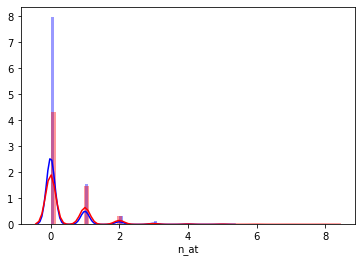

In [51]:
sns.distplot(data_tokenParse.loc[data_tokenParse.target==1].n_at, color='blue')
sns.distplot(data_tokenParse.loc[data_tokenParse.target!=1].n_at, color='red')

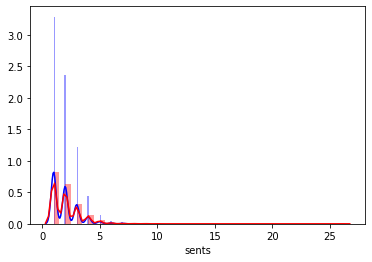

In [60]:
sns.distplot(data_tokenParse.loc[data_tokenParse.target==1].sents, color='blue')
sns.distplot(data_tokenParse.loc[data_tokenParse.target!=1].sents, color='red')

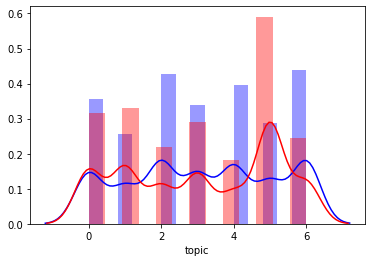

In [57]:
sns.distplot(data_tokenParse.loc[data_tokenParse.target==1].topic, color='blue')
sns.distplot(data_tokenParse.loc[data_tokenParse.target!=1].topic, color='red')

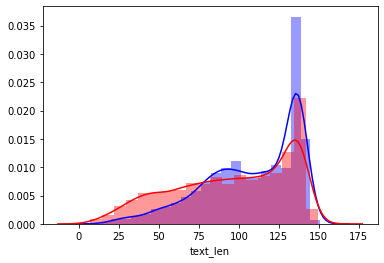

In [58]:
sns.distplot(data_tokenParse.loc[data_tokenParse.target==1].text_len, color='blue')
sns.distplot(data_tokenParse.loc[data_tokenParse.target!=1].text_len, color='red')

In [53]:
def show_ents(docs): 
    doc = nlp(docs)
    print(docs)
    if doc.ents:
        t = [ent.label_ for ent in doc.ents]
#         [print(f"{ent.text} ::::: {ent.label_} ::::: {str(spacy.explain(ent.label_))}") for ent in doc.ents]
        if "GPE" in t: 
            print("--- Real place detected")
            return(1)
        else: 
            print("--- Not a real place")
            return(0)
    else: 
        print("--- No entities found")
        return(0)

In [54]:
data_tokenParse['location'].fillna(value="Unknown", inplace=True)
data_tokenParse.loc[data_tokenParse.location != "Unknown"]

,id,keyword,location,text,target,n_hash,n_at,has_kw,has_loc,text_len,...,puncts,spaces,dets,advs,auxs,entities,sents,n_nchunks,topic,topic_nda
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,0,1,1,1,55,...,2,0,0,1,0,1,3,1,0,0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,2,0,1,1,67,...,2,0,1,1,0,1,2,2,0,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,1,0,1,1,82,...,4,0,0,1,0,1,1,3,6,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,0,0,1,1,34,...,1,0,0,0,0,0,2,1,5,4
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,0,0,1,1,76,...,1,0,1,0,0,1,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,0,0,1,1,51,...,0,0,1,0,0,0,1,3,6,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,1,1,1,1,107,...,3,0,3,0,0,1,3,7,1,4
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,0,0,1,1,107,...,0,0,3,2,0,1,2,4,5,4
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,3,0,1,1,93,...,3,0,1,0,0,2,1,3,6,0


In [63]:
data_tokenParse['trueloc'] = [show_ents(t) for t in data_tokenParse.location]

Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Birmingham
--- Real place detected
Est. September 2012 - Bristol
--- N

CA physically- Boston Strong?
--- Real place detected
Yeezy Taught Me , NV
--- Not a real place
Unknown
--- No entities found
CA physically- Boston Strong?
--- Real place detected
United States
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Rock Hill, SC
--- Not a real place
Coolidge, AZ
--- Not a real place
Republic of Texas
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Phoenix, AZ
--- Real place detected
Ljubljana, Slovenia
--- No entities found
Connecticut
--- Real place detected
Tacoma,Washington
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Subconscious LA
--- No entities found
BIG D  HOUSTON/BOSTON/DENVER
--- No entities found
Chandler, AZ
--- Not a real place
ColoRADo
--- No entities found
sindria
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Texas
--- Real place detected
Elk Grove, CA, USA
--- Real place detected
Texas
--- Real pla

Unknown
--- No entities found
Peshawar
--- No entities found
Unknown
--- No entities found
LEALMAN, FLORIDA
--- No entities found
Los Angeles, CA
--- Real place detected
San Francisco, CA
--- Real place detected
#GDJB #ASOT
--- Not a real place
Groningen, Netherlands, Europe
--- Real place detected
Livingston, IL  U.S.A.
--- Not a real place
Arundel 
--- No entities found
Unknown
--- No entities found
America
--- Real place detected
Anna Maria, FL
--- Not a real place
USA
--- Real place detected
israel
--- No entities found
The Hammock, FL, USA
--- Real place detected
??????????????????
--- No entities found
SÌ£o Paulo SP,  Brasil
--- Not a real place
in Dimitri's arms
--- Real place detected
Oslo, Norway
--- Real place detected
Los Angeles
--- Real place detected
Loughton, Essex, UK
--- Real place detected
guaravitas
--- No entities found
Unknown
--- No entities found
Score More Goals Buying @
--- No entities found
NEW YORK
--- No entities found
Ireland
--- Real place detected
Unknown

My heart is a ghost town!
--- No entities found
The Great State of Texas
--- Real place detected
Unknown
--- No entities found
Alicante, Valencia
--- Real place detected
Unknown
--- No entities found
Atlanta
--- Real place detected
Unknown
--- No entities found
Greensboro, NC
--- Real place detected
 Indiana
--- Real place detected
the local dump
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Seattle
--- Real place detected
#SOUTHAMPTON ENGLAND
--- Not a real place
?205?478?
--- No entities found
Waterford MI
--- Not a real place
Iowa, USA
--- Real place detected
va
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Florida
--- Real place detected
Unknown
--- No entities found
california mermaid ? 
--- Real place detected
New York ? ATL
--- Real place detected
USA/SO FLORIDA via BROOKLYN NY
--- Not a real place
Unknown
--- No entities found
H / pez & sophia 
---

ÌÏT: 39.982988,-75.261624
--- Not a real place
Unknown
--- No entities found
#EngleWood CHICAGO 
--- Not a real place
302???? 815
--- Not a real place
New Your
--- No entities found
Texas
--- Real place detected
New York, NY
--- Real place detected
Unknown
--- No entities found
PURPLE BOOTH STUDIOã¢
--- No entities found
Cloud 9
--- Not a real place
Unknown
--- No entities found
Former Yugoslav Republic of Macedonia
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
3?3?7?SLOPelousas??2?2?5?
--- No entities found
Unknown
--- No entities found
316
--- Not a real place
Global
--- No entities found
#WhereverI'mAt
--- Not a real place
Huber Heights, OH
--- Not a real place
Unknown
--- No entities found
Miami ??
--- Real place detected
Houston, TX
--- Real place detected
Every where
--- No entities found
Arizona 
--- Real place detected
Unknown
--- No entities found
401 livin'
--- Not a real place
MI
--- No entities found
EPTX


New Hampshire
--- Real place detected
Manchester, NH
--- Real place detected
Tulsa, Oklahoma
--- Real place detected
Unknown
--- No entities found
Auburn, AL
--- Not a real place
Unknown
--- No entities found
Unknown
--- No entities found
taken by piper curda
--- No entities found
Toronto
--- Real place detected
Scotland 
--- Real place detected
Nigeria, Global
--- Real place detected
Fort Walton Beach, Fl
--- Not a real place
Sweden
--- Real place detected
Groton, CT
--- Not a real place
Brisbane Australia
--- Not a real place
NY Capital District
--- Real place detected
Peoria
--- Real place detected
Reading UK
--- Real place detected
UK
--- Real place detected
Concord, NH 
--- Real place detected
CORNFIELDS
--- No entities found
Worcester, MA
--- No entities found
Roanoke, VA
--- Real place detected
nj
--- No entities found
Unknown
--- No entities found
MA via PA
--- No entities found
Boston, MA
--- Real place detected
World Wide
--- No entities found
New Hampshire
--- Real place det

Unknown
--- No entities found
Denver, CO
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Stockholm, Sweden
--- Real place detected
Worldwide
--- No entities found
Azeroth
--- No entities found
Lytham St Anne's 
--- Not a real place
Unknown
--- No entities found
Unknown
--- No entities found
Ylisse
--- Not a real place
Wisconsin
--- Real place detected
Portugal
--- No entities found
All around the world baby
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
@UntmdOutdoors #T.O.R.K 
--- No entities found
Lima, PerÌ¼
--- Real place detected
Unknown
--- No entities found
Toronto
--- Real place detected
Piedmont Area, North Carolina
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Buxton, Venice, and Nottingham
--- Real place detected
Quito, Ecuador.
--- Real place detected
Inexpressible Island 
--- No entities found
Unknown
--- N

Tennessee
--- Real place detected
Cape Cod, Massachusetts USA
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Pakistan
--- Real place detected
bk. 
--- No entities found
Unknown
--- No entities found
Lansing, Michigan
--- Real place detected
Peterborough, Ont.
--- Not a real place
Johannesburg, South Africa
--- Real place detected
On the court 
--- No entities found
Cherry Creek Denver CO
--- Not a real place
Unknown
--- No entities found
Traverse City, MI
--- Real place detected
Unknown
--- No entities found
See the barn of bleakness
--- No entities found
Mumbai
--- Real place detected
Hertfordshire 
--- No entities found
ÌÏT: 41.252426,-96.072013
--- No entities found
Nairobi, Kenya
--- Real place detected
Unknown
--- No entities found
California 
--- Real place detected
Greeley, CO
--- Not a real place
'soooota
--- No entities found
Sacramento
--- Real place detected
Unknown
--- No entiti

Rural Northern Nevada
--- Not a real place
Republic of the Philippines
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Philippines 
--- Real place detected
Washington, DC
--- Real place detected
hyderabad
--- No entities found
Vancouver (HQ) and worldwide
--- Not a real place
Quezon City, Philippines
--- Real place detected
Geneva
--- Real place detected
Hartford,  connecticut
--- Real place detected
Sioux Falls, SD
--- Not a real place
Cornwall
--- No entities found
Beside Basketball
--- No entities found
Rome, Italy
--- Real place detected
Tafekop Ga-Matsepe
--- Not a real place
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Melbourne
--- No entities found
Vilnius
--- No entities found
Geneva
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Made in Ameri

Bristol, UK
--- Real place detected
labuan, malaysia
--- No entities found
United Kingdom
--- Real place detected
right next to you
--- No entities found
CT ? NYC
--- No entities found
www.tmgcgart.com
--- No entities found
Unknown
--- No entities found
London, England
--- Real place detected
Los Angeles, CA
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Australia
--- Real place detected
Brisbane
--- No entities found
Melbourne-ish
--- Not a real place
617-BTOWN-BEATDOWN
--- No entities found
Brackley Beach, PE, Canada
--- Real place detected
London
--- Real place detected
518
--- Not a real place
Nottingham, England
--- Real place detected
eARth 3
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Enniscrone & Aughris, Sligo 
--- Not a real place
Mostly Wellington, NZ 
--- Real place detected
London
--- Real place detected
Unknown
--- No entities found
USA
--- Real place detected
Unknown
--- No entities found
617-BTOW

Mumbai
--- Real place detected
Coimbatore
--- No entities found
Unknown
--- No entities found
Chicago, IL 60607
--- Real place detected
Palo Alto, California
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
India
--- Real place detected
Chicagoland
--- Real place detected
Unknown
--- No entities found
UK
--- Real place detected
India
--- Real place detected
Mumbai
--- Real place detected
Los Angeles
--- Real place detected
Unknown
--- No entities found
New Delhi
--- Real place detected
India
--- Real place detected
Mumbai
--- Real place detected
India
--- Real place detected
Mumbai
--- Real place detected
Unknown
--- No entities found
India
--- Real place detected
Chicago, IL
--- Real place detected
Unknown
--- No entities found
Minneapolis,MN,US
--- Real place detected
Chicago
--- Real place detected
Unknown
--- No entities found
Chicago, IL 
--- Real place dete

Unknown
--- No entities found
Bangalore. India
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
New York
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Bangkok Thailand
--- Not a real place
Unknown
--- No entities found
New York
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
New York
--- Real place detected
Unknown
--- No entities found
Brisbane.
--- No entities found
New York
--- Real place detected
Geneva
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Manchester
--- No entities found
PG Chillin!
--- Not a real place
Manchester
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
REPUBLICA DOMINICANA
--- No

Financial News and Views
--- Real place detected
R'lyeh, South Pacific
--- Not a real place
taking bath do not disturb
--- No entities found
Alberta, VA
--- Real place detected
The Howling
--- No entities found
United Kingdom,Fraserburgh
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
WorldWideWeb
--- No entities found
Dreieich, Germany
--- Real place detected
Pembroke NH
--- No entities found
Bayonne, NJ
--- Real place detected
Colorado Springs
--- Real place detected
Dubai
--- Real place detected
United States
--- Real place detected
Unknown
--- No entities found
IG: AyshBanaysh
--- Not a real place
fl
--- No entities found
Unknown
--- No entities found
Halfrica
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Jacksonville Beach, FL
--- Real place detected
Melbourne
--- No entities found
Unknown
--- No entities found
San Francisco, CA
--- Real place detected
Richmond Heights, OH
--- Real place detected
New Hampshire

Unknown
--- No entities found
Alexandria, VA, USA
--- Real place detected
Ireland
--- Real place detected
Calgary, AB
--- Real place detected
Reddit
--- No entities found
Nashville, TN
--- Real place detected
Bakersfield, CA
--- Real place detected
Calgary, Alberta, Canada
--- Real place detected
Somewhere in the Canada
--- Real place detected
Nagpur
--- Real place detected
Los Angeles, CA
--- Real place detected
Surrey & Manchester
--- Not a real place
Calgary,AB, Canada
--- Real place detected
Unknown
--- No entities found
Calgary
--- Real place detected
Fort Myers, Florida
--- Real place detected
Atlanta, GA
--- Real place detected
Im In Route 
--- Real place detected
Madison, WI
--- Not a real place
Kansas City
--- Real place detected
North Hastings Ontario
--- Not a real place
U.S. Northern Virginia
--- Real place detected
M!$$!$$!PP!
--- No entities found
Indiana
--- Real place detected
Los Angeles
--- Real place detected
Cochrane, Alberta, Canada
--- Real place detected
Leduc, A

Bloomington, IN
--- Not a real place
Unknown
--- No entities found
Yamaku Academy, Class 3-4
--- Not a real place
United States
--- Real place detected
Whitby, ON
--- Not a real place
Unknown
--- No entities found
Kajang ? UiTM Puncak Alam
--- Real place detected
Dallas, TX
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
? Philly Baby ?
--- Not a real place
Cleveland, TN
--- Real place detected
they/them
--- No entities found
Unknown
--- No entities found
my deli
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Winnipeg
--- No entities found
New Hampshire
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Trost District
--- No entities found
?????? in Yokohama Japan
--- Not a real place
London
--- Real place detected
LFC x GSW
--- Not a real place
Unknown
--- No entities found
Unknown
--- No entities found
Chicago, IL
--- Real

Lima, Ohio
--- Real place detected
Ireland
--- Real place detected
Lowell, MA
--- Real place detected
playing soccer & eating pizza
--- Not a real place
Unknown
--- No entities found
NY
--- No entities found
Hueco Mundo
--- Not a real place
Unknown
--- No entities found
Nairobi
--- No entities found
Boston Û¢ Cape Cod ?
--- Real place detected
Unknown
--- No entities found
Rafael castillo
--- Not a real place
Unknown
--- No entities found
New Jersey
--- Real place detected
Fort Wayne, IN
--- Not a real place
Enterprise, NV
--- Not a real place
Unknown
--- No entities found
Unknown
--- No entities found
434
--- Not a real place
Grand Rapids MI
--- Real place detected
U.S.A
--- No entities found
434
--- Not a real place
New York 
--- Real place detected
Utica NY
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Nunya
--- No entities found
Houston, TX  
--- Real place detected
USA
--- Real place detected
Unknown
--- No entities found
TX
--- No entities fou

Derby
--- No entities found
Mississauga, Ontario
--- Real place detected
Delhi 
--- Real place detected
Keighley, England
--- Real place detected
Pomfret/Providence
--- No entities found
Baltimore, MD
--- Real place detected
Unknown
--- No entities found
East Lansing, MI
--- Not a real place
Rocketing through the galaxy
--- No entities found
New York
--- Real place detected
boston
--- No entities found
United States
--- Real place detected
New York
--- Real place detected
New York
--- Real place detected
Warrandyte, Australia
--- Real place detected
British Columbia, Canada
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Aix-en-Provence/Utrecht
--- No entities found
Philadelphia
--- Real place detected
New York
--- Real place detected
Van Buren, MO
--- Not a real place
New York
--- Real place detected
New York
--- Real place detected
Niagara Falls, Ontario
--- Real place detected
USA
--- Real place detected
Unknown
--- No entities found
Hawaii USA
--

Kansas City
--- Real place detected
Unknown
--- No entities found
Buffalo, NY
--- Real place detected
Unknown
--- No entities found
i love you zayn
--- No entities found
Gotham City
--- Real place detected
Seattle, WA
--- Real place detected
WORLD WIDE
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
TX
--- No entities found
England 
--- Real place detected
Sumter, SC
--- No entities found
Someday I'll live in England. 
--- Real place detected
Hogsmeade
--- No entities found
5/5 access / rt link please x
--- Not a real place
å_: ?? ÌÑ ? : ?
--- No entities found
10-Jul
--- No entities found
Unknown
--- No entities found
Kansas City
--- Real place detected
The South & WestCoast 
--- Not a real place
Hogwarts
--- No entities found
va
--- No entities found
Unknown
--- No entities found
Portland, OR
--- Real place detected
Unknown
--- No entities found
?@symbolicjensen?
--- No entities found
Unknown
--- No entities found
Los Angeles, California
--- Real pla

Chiyoda Ward, Tokyo
--- Real place detected
rome
--- No entities found
Athens,Greece
--- Real place detected
EastCarolina
--- Not a real place
Brazil
--- Real place detected
IN our hearts  Earth Global 
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
France
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
tokyo
--- No entities found
china
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Brazil
--- Real place detected
between ideas & 3-5pm AEST
--- No entities found
Unknown
--- No entities found
Japan
--- Real place detected
Malaysia
--- Real place detected
Zimbabwe
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Vancouver, British Columbia
--- Real place detected
Unknown
--- No entities found
Starling City
--- No entities found
The Great State of Maine 
--- Not 

Land of Lincoln
--- Not a real place
Unknown
--- No entities found
Kenya
--- Real place detected
Australia
--- Real place detected
Unknown
--- No entities found
NYC&NJ
--- No entities found
swindon
--- No entities found
Croydon
--- Real place detected
Asia
--- Not a real place
Coventry
--- No entities found
Unknown
--- No entities found
Toronto, ON, Canada
--- Real place detected
Singapore
--- Real place detected
Manchester, England
--- Real place detected
San Jose, CA, USA
--- Real place detected
UK, Republic of Ireland and Australia
--- Real place detected
Milton keynes
--- Not a real place
Pontefract UK
--- No entities found
the Dirty D
--- No entities found
United States
--- Real place detected
Unknown
--- No entities found
Paducah, KY
--- Not a real place
Maryland
--- Real place detected
Unknown
--- No entities found
Asia European Continent Korea 
--- Not a real place
Unknown
--- No entities found
Unknown
--- No entities found
Athens, Greece
--- Real place detected
Unknown
--- No 

Unknown
--- No entities found
Nottingham, England
--- Real place detected
 The World
--- No entities found
Own planet!!
--- No entities found
Unknown
--- No entities found
Vancouver, BC, Canada
--- Real place detected
Unknown
--- No entities found
Ireland
--- Real place detected
Ecuador
--- Real place detected
London, UK
--- Real place detected
Unknown
--- No entities found
Stay Tuned ;) 
--- No entities found
Cimerak - Pangandaran
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Cottonwood Arizona
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
London
--- Real place detected
India
--- Real place detected
Norway
--- Real place detected
Unknown
--- No entities found
Wausau, Wisconsin
--- Real place detected
Unknown
--- No entities found
Orlando, FL
--- Real place detected
Raleigh, NC
--- Real place detected
BOSTON-LONDON
--- Real place detected
Boston, MA
--- Real place detected
GLOBAL/WORLD

Unknown
--- No entities found
Paris (France)
--- Real place detected
Johannesburg, South Africa
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Den Helder, Rijkswerf
--- Not a real place
SE London(heart is by the sea)
--- No entities found
Warsaw
--- Real place detected
Aztec NM
--- Not a real place
Denver, CO
--- Real place detected
Washington, D.C.
--- Real place detected
World
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Fort Calhoun, NE
--- Real place detected
Bournemouth, Dorset, UK
--- Real place detected
Virginia
--- Real place detected
Somecity, Somerset, MD
--- Real place detected
Dover, DE
--- Real place detected
Cavite, Philippines
--- Real place detected
Korea
--- Real place detected
Seattle
--- Real place detected
M!A: None
--- No entities found
United Kingdom
--- Real place detected
Purfleet
--- No entities found
Unknown
--- No entities found
The Memesphere
--- No entities found
21 | PNW
--- Not a re

Narnia
--- Real place detected
Manhattan
--- Real place detected
elena's bed // info on link
--- No entities found
Elsewhere, NZ
--- No entities found
518 åá NY
--- Not a real place
The Shady Hyenatown of Finland
--- Not a real place
Maryland 
--- Real place detected
Unknown
--- No entities found
worldwide
--- No entities found
East TN.
--- Not a real place
Unknown
--- No entities found
Milwaukee WI
--- Real place detected
Toronto
--- Real place detected
Macon, GA
--- Real place detected
Narnia
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Torry Alvarez love forever ? ?
--- Not a real place
Detroit
--- Real place detected
Petaluma, CA
--- No entities found
Unknown
--- No entities found
?^åá??åá?^?? ??
--- No entities found
Unknown
--- No entities found
?
--- No entities found
Singapore
--- Real place detected
Oxford / bristol
--- Not a real place
PARACHUTE
--- Not a real place
Near Warrington
--- No entities found
Unkn

Skyhold
--- No entities found
Australia
--- Real place detected
Amman,Jordan
--- Real place detected
tripoli international airport
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Auckland, New Zealand
--- Real place detected
Unknown
--- No entities found
NYC,US - Cali, Colombia
--- Real place detected
Unknown
--- No entities found
QLD Australia
--- Not a real place
Geneva, Switzerland
--- Real place detected
Trinidad & Tobago
--- Not a real place
SF Bay Area
--- Real place detected
#HarleyChick#PJNT#RunBenRun
--- Not a real place
Toronto, Ontario
--- Real place detected
New Jersey
--- Real place detected
Big NorthEast Litter Box
--- No entities found
Sand springs oklahoma
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Surry Hills, Sydney
--- Real place detected
Sand springs oklahoma
--- No entities found
#HarleyChick#PJNT#RunBenRun
--- Not a real place
Unknown
--- No entities found
USA
--- Real place detected
Thornton

MÌ©rida, YucatÌÁn
--- No entities found
Scituate, MA
--- No entities found
USA
--- Real place detected
Unknown
--- No entities found
United States
--- Real place detected
Unknown
--- No entities found
United States
--- Real place detected
USA
--- Real place detected
hkXfYMhEx
--- No entities found
US
--- Real place detected
USA
--- Real place detected
USA
--- Real place detected
Unknown
--- No entities found
Hamilton County, IN
--- Real place detected
United States
--- Real place detected
USA
--- Real place detected
USA
--- Real place detected
USA
--- Real place detected
Unknown
--- No entities found
Dakar
--- No entities found
United States
--- Real place detected
USA
--- Real place detected
USA
--- Real place detected
USA
--- Real place detected
USA
--- Real place detected
In your head
--- No entities found
USA
--- Real place detected
Unknown
--- No entities found
North Carolina, USA
--- Real place detected
USA
--- Real place detected
USA
--- Real place detected
USA
--- Real place de

MA
--- No entities found
hey Georgia
--- Real place detected
Coventry
--- No entities found
nc
--- No entities found
Unknown
--- No entities found
kenya
--- No entities found
My subconscious
--- No entities found
London
--- Real place detected
 New England
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
UAE,Sharjah/ AbuDhabi
--- Not a real place
Tampa, FL
--- Real place detected
New York
--- Real place detected
The Web
--- No entities found
Paris.
--- Real place detected
Am International
--- Not a real place
Team Slytherin
--- No entities found
Michel Delving.
--- Not a real place
Hame
--- No entities found
Brizzle City !
--- Real place detected
Unknown
--- No entities found
???  Dreamz
--- Not a real place
???  Dreamz
--- Not a real place
Unknown
--- No entities found
texasss
--- No entities found
Diamondville
--- Real place detected
Massachusetts, USA
--- Real place detected
Unknown
--- No entities found
The TARDIS
--- No entities found
Unknown
--- N

Unknown
--- No entities found
Unknown
--- No entities found
Homs- Syria
--- Real place detected
lagos. Unilag
--- Not a real place
Unknown
--- No entities found
Did anybody see me here ??
--- No entities found
Worldwide
--- No entities found
Unknown
--- No entities found
Na waffi
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
GLOBAL
--- No entities found
Nigeria
--- No entities found
Nigeria
--- No entities found
Worldwide
--- No entities found
Nigeria
--- No entities found
WorldWide
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Helsinki
--- Not a real place
Saudi Arabia
--- Real place detected
Unknown
--- No entities found
Garden City, NY
--- Real place detected
Unknown
--- No entities found
Worldwide
--- No entities found
19.600858, -99.047821
--- Not a real place
United States
--- Real place det

Unknown
--- No entities found
world
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Beit El - Israel
--- Not a real place
Unknown
--- No entities found
New Delhi, India
--- Real place detected
Unknown
--- No entities found
Iraq|Afghanistan| RSA |Baghdad
--- No entities found
Sanganer, Rajasthan
--- No entities found
Loading...
--- No entities found
Chennai
--- No entities found
BILASPUR,CHHATTISGARH,495001
--- Not a real place
Niall's arms
--- Not a real place
Canada
--- Real place detected
proudly South African
--- Not a real place
Unknown
--- No entities found
MAD as Hell
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
MAD as Hell
--- No entities found
????? ???? ????
--- No entities found
Florida
--- Real place detected
Charleston S.C.
--- Real place detected
MAD as Hell
--- No entities found
Unknown
--- No entities found
Iraq|Afghanistan| RSA |Baghdad
--- No entities found
Everywhere
--- No entities found
Unknown
-

Unknown
--- No entities found
Chicago, Illinois
--- Real place detected
Colorado
--- Real place detected
London
--- Real place detected
Ireland
--- Real place detected
Kirkwall
--- No entities found
Unknown
--- No entities found
uk
--- No entities found
Sweden
--- Real place detected
Portsmouth, UK
--- Real place detected
cork
--- No entities found
Scotland
--- Real place detected
dublin 
--- No entities found
ELVY
--- No entities found
Hackney, London
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
South Africa
--- Real place detected
Tunbridge Wells
--- Not a real place
lowestoft
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
North East / Middlesbrough 
--- Real place detected
Unknown
--- No entities found
London
--- Real place detected
Unknown
--- No entities found
Londonstan
--- No entities found
Unknown
--- No entities found
Tring, UK
--- Real place detected
Stage with Trey Songz
-

Very SW CA, USA....Draenor
--- Real place detected
Unknown
--- No entities found
New Zealand
--- Real place detected
Kenya
--- Real place detected
Unknown
--- No entities found
Barbados
--- No entities found
Amsterdam & Worldwide
--- Not a real place
3rd Eye Chakra
--- Not a real place
Perth, Australia
--- Real place detected
 ? ??????? ? ( ?? å¡ ? ? ? å¡)
--- No entities found
USA
--- Real place detected
ARGENTINA
--- No entities found
Unknown
--- No entities found
Earth
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Hawaii, USA
--- Real place detected
Hawaii, USA
--- Real place detected
Unknown
--- No entities found
Unknown
--- No entities found
Paris
--- Real place detected
Unknown
--- No entities found
California, USA
--- Real place detected
Ted&Qz Inc, Ireland, Europe
--- Real place detected
Santiago de Cmpostela Galicia
--- Not a real place
Massachusetts
--- Real place detected
cleveland, oh
--- No entities found
No

Victoria, BC
--- Real place detected
Unknown
--- No entities found
Georgia ? Tennessee
--- Real place detected
Unknown
--- No entities found
Lagos, Nigeria
--- Not a real place
Puerto Rico
--- Real place detected
Unknown
--- No entities found
Gettysburg, PA
--- Real place detected
Austin, Texas
--- Real place detected
Unknown
--- No entities found
Florida USA
--- Real place detected
Hermitage, PA
--- No entities found
Unknown
--- No entities found
Jakarta, Indonesia
--- Real place detected
Puerto Rico
--- Real place detected
San Diego, CA
--- Real place detected
calgary,ab
--- No entities found
Newton, NJ 07860
--- Real place detected
Unknown
--- No entities found
she/her/your majesty/empress
--- No entities found
Unknown
--- No entities found
Unknown
--- No entities found
Houston
--- Real place detected
Unknown
--- No entities found
LYNBROOK
--- No entities found
Argus Industries \m/666\m/
--- Not a real place
Unknown
--- No entities found
Friendswood, TX
--- No entities found
Sugar L

Unknown
--- No entities found


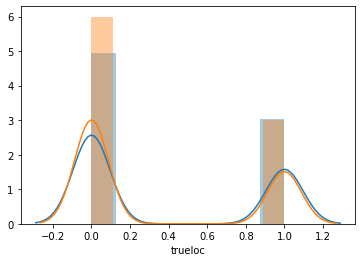

In [64]:
sns.distplot(data_tokenParse.loc[data_tokenParse.target==1].trueloc)
sns.distplot(data_tokenParse.loc[data_tokenParse.target!=1].trueloc)

In [65]:
data_tokenParse.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'n_hash', 'n_at',
       'has_kw', 'has_loc', 'text_len', 'nouns', 'verbs', 'adps', 'puncts',
       'spaces', 'dets', 'advs', 'auxs', 'entities', 'sents', 'n_nchunks',
       'topic', 'topic_nda', 'trueloc'],
      dtype='object')

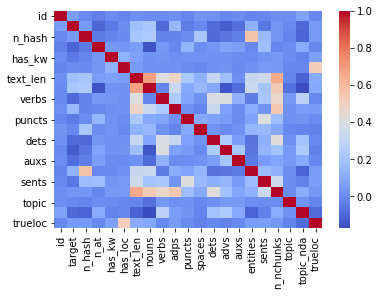

In [66]:
sns.heatmap(data_tokenParse.corr(), cmap = "coolwarm")

### Model Training

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('nbclf', MultinomialNB())])
clf_svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf_svc', LinearSVC())])

clf_nb.fit(data_tokenParse.text, data_tokenParse.target)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...e,
        vocabulary=None)), ('nbclf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [69]:
from sklearn.model_selection import KFold
def kf_xv(df, target, mod_name): 
    """
    K-fold cross-validation function to test model scores
    """
    scores = []
    kf = KFold(n_splits=6, shuffle=True)
    
    for i in range(6): 
        result = next(kf.split(df), None)
        x_train = df.iloc[result[0]]
        x_test = df.iloc[result[1]]
        y_train = target.iloc[result[0]]
        y_test = target.iloc[result[1]]
        model = mod_name.fit(x_train, y_train)
        predictions = mod_name.predict(x_test)
        scores.append(model.score(x_test, y_test))
    print('Scores from each iteration: ', scores)
    print('Average K-Fold Score: ', np.mean(scores))

# from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
def kf_xv_grid(df, target, mod_name, grid={}): 
    """
    K-fold cross-validation function to test model scores
    """
    scores = []
    
    gscv = GridSearchCV(mod_name, grid, cv=10)

    gscv.fit(df, target)
    
    print("tuned hyperparameters :(best parameters) ",gscv.best_params_)
    print("accuracy :",gscv.best_score_)

In [70]:
kf_xv(data_tokenParse.text, data_tokenParse.target, clf_nb)

Scores from each iteration:  [0.8069345941686368, 0.7919621749408984, 0.7982663514578409, 0.7998423955870765, 0.8022064617809299, 0.7990543735224587]
Average K-Fold Score:  0.7997110585763068


In [71]:
kf_xv(data_tokenParse.text, data_tokenParse.target, clf_svc)

Scores from each iteration:  [0.8053585500394012, 0.7903861308116628, 0.7832939322301025, 0.7817178881008668, 0.7825059101654847, 0.7817178881008668]
Average K-Fold Score:  0.7874967165747307


In [72]:
pred_clfNB = clf_nb.predict(data_tokenParse.text)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [74]:
print(confusion_matrix(data_tokenParse.target, pred_clfNB))

[[4202  140]
 [ 806 2465]]


In [78]:
print(accuracy_score(data_tokenParse.target, pred_clfNB))

0.8757388677262578


In [80]:
print(classification_report(data_tokenParse.target, pred_clfNB))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4342
           1       0.95      0.75      0.84      3271

   micro avg       0.88      0.88      0.88      7613
   macro avg       0.89      0.86      0.87      7613
weighted avg       0.89      0.88      0.87      7613



In [81]:
data_tokenParse['nb_class'] = clf_nb.predict(data_tokenParse.text)

In [82]:
data_tokenParse['svc_class'] = clf_svc.predict(data_tokenParse.text)

In [83]:
data_tokenParse.sample(10)

,id,keyword,location,text,target,n_hash,n_at,has_kw,has_loc,text_len,...,advs,auxs,entities,sents,n_nchunks,topic,topic_nda,trueloc,nb_class,svc_class
1660,2397,collapsed,Unknown,Look: #I have collapsed #after attempting to m...,0,2,0,1,0,73,...,0,0,2,2,2,5,4,0,0,0
412,598,arsonist,ss,@_301DC @Cloudy_goldrush i hate white people mo,1,0,2,1,1,47,...,0,0,0,3,4,5,4,0,0,1
3267,4692,engulfed,Unknown,Men escape car engulfed in flames in Parley's ...,1,0,0,1,0,126,...,0,0,0,1,5,3,0,0,1,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,0,0,1,1,134,...,1,0,1,3,7,2,0,0,0,0
4421,6292,hostage,Unknown,Egyptian Militants Tied to ISIS Threaten to Ki...,1,0,0,1,0,116,...,0,0,1,2,5,6,0,0,1,1
5120,7301,nuclear%20reactor,"USA, North Dakota",Salem 2 nuclear reactor shut down over electri...,1,0,0,1,1,136,...,0,0,2,1,5,0,0,1,1,1
5038,7184,mudslide,"Memphis, TN",Oso Washington Mudslide Response Interview ÛÒ...,1,0,0,1,1,76,...,0,0,1,1,2,6,0,1,1,1
7136,10222,volcano,"Hawaii, USA",USGS EQ: M 1.9 - 5km S of Volcano Hawaii: Time...,1,1,0,1,1,135,...,0,0,4,4,5,4,0,1,1,1
1133,1633,bombing,Unknown,The cryptic words that guided pilots on the Hi...,1,0,0,1,0,92,...,0,0,0,1,3,2,0,0,1,1
6622,9485,terrorism,Unknown,http://t.co/EQjCpWILVn: Articles In Saudi Pres...,0,0,0,1,0,132,...,0,0,1,1,7,6,0,0,0,0


In [784]:
data_tokenParse.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'n_hash', 'n_at',
       'has_kw', 'has_loc', 'sentiment', 'text_len', 'nouns', 'verbs', 'adps',
       'puncts', 'spaces', 'dets', 'advs', 'auxs', 'entities', 'sents',
       'n_nchunks', 'topic', 'topic_nda', 'trueloc', 'nb_class', 'svc_class'],
      dtype='object')

In [84]:
drop_cols = ['keyword', 'location', 'text', 'id', 'target']
X = data_tokenParse.drop(columns=drop_cols, inplace=False)
y = data_tokenParse.target

In [85]:
X.head(10)

,n_hash,n_at,has_kw,has_loc,text_len,nouns,verbs,adps,puncts,spaces,...,advs,auxs,entities,sents,n_nchunks,topic,topic_nda,trueloc,nb_class,svc_class
0,1,0,0,0,69,3,3,1,0,0,...,1,0,1,1,4,5,4,0,0,1
1,0,0,0,0,38,5,0,1,1,0,...,0,0,0,2,3,2,2,0,1,1
2,0,0,0,0,133,8,5,3,3,0,...,0,0,0,2,6,4,4,0,1,1
3,1,0,0,0,65,5,2,1,0,0,...,0,0,2,1,3,6,3,0,1,1
4,2,0,0,0,88,6,3,4,0,0,...,1,0,2,1,4,0,4,0,0,1
5,3,0,0,0,110,9,1,2,4,0,...,0,0,2,2,7,4,3,0,1,1
6,2,0,0,0,95,10,1,2,1,0,...,0,0,1,1,5,4,6,0,1,1
7,0,0,0,0,59,4,3,3,1,0,...,0,0,0,2,6,2,4,0,0,1
8,0,0,0,0,79,4,2,2,0,0,...,2,0,0,1,3,0,0,0,1,1
9,0,0,0,0,52,2,3,2,1,0,...,0,0,0,1,3,1,4,0,1,1


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
X = pd.DataFrame(scaler.fit_transform(X))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [89]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.518250,-0.499112,-11.126692,-1.416166,-0.948439,-0.807264,0.152001,-0.426339,-0.892316,-0.277124,...,0.223139,-0.189749,0.269721,-0.843543,-0.081431,0.925243,0.658961,-0.740261,-0.721227,1.185804
1,-0.402936,-0.499112,-11.126692,-1.416166,-1.866166,-0.049237,-1.447060,-0.426339,-0.484488,-0.277124,...,-0.718000,-0.189749,-0.711352,-0.001769,-0.587501,-0.551873,-0.184177,-0.740261,1.386527,1.185804
2,-0.402936,-0.499112,-11.126692,-1.416166,0.946223,1.087802,1.218042,1.158484,0.331170,-0.277124,...,-0.718000,-0.189749,-0.711352,-0.001769,0.930709,0.432871,0.658961,-0.740261,1.386527,1.185804
3,0.518250,-0.499112,-11.126692,-1.416166,-1.066856,-0.049237,-0.381019,-0.426339,-0.892316,-0.277124,...,-0.718000,-0.189749,1.250793,-0.843543,-0.587501,1.417616,0.237392,-0.740261,1.386527,1.185804
4,1.439436,-0.499112,-11.126692,-1.416166,-0.385962,0.329776,0.152001,1.950895,-0.892316,-0.277124,...,0.223139,-0.189749,1.250793,-0.843543,-0.081431,-1.536618,0.658961,-0.740261,-0.721227,1.185804
5,2.360622,-0.499112,-11.126692,-1.416166,0.265329,1.466815,-0.914039,0.366073,0.738999,-0.277124,...,-0.718000,-0.189749,1.250793,-0.001769,1.436779,0.432871,0.237392,-0.740261,1.386527,1.185804
6,1.439436,-0.499112,-11.126692,-1.416166,-0.178733,1.845828,-0.914039,0.366073,-0.484488,-0.277124,...,-0.718000,-0.189749,0.269721,-0.843543,0.424639,0.432871,1.502100,-0.740261,1.386527,1.185804
7,-0.402936,-0.499112,-11.126692,-1.416166,-1.244480,-0.428250,0.152001,1.158484,-0.484488,-0.277124,...,-0.718000,-0.189749,-0.711352,-0.001769,0.930709,-0.551873,0.658961,-0.740261,-0.721227,1.185804
8,-0.402936,-0.499112,-11.126692,-1.416166,-0.652398,-0.428250,-0.381019,0.366073,-0.892316,-0.277124,...,1.164278,-0.189749,-0.711352,-0.843543,-0.587501,-1.536618,-1.027315,-0.740261,1.386527,1.185804
9,-0.402936,-0.499112,-11.126692,-1.416166,-1.451709,-1.186277,0.152001,0.366073,-0.484488,-0.277124,...,-0.718000,-0.189749,-0.711352,-0.843543,-0.587501,-1.044246,0.658961,-0.740261,1.386527,1.185804


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logit_mod = LogisticRegression(solver='lbfgs', max_iter=4000)

In [94]:
logit_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
logit_pred = logit_mod.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [97]:
accuracy_score(y_test, logit_pred)

0.9527145359019265

In [98]:
print(confusion_matrix(y_test, logit_pred))

[[1263   43]
 [  65  913]]


In [99]:
print(classification_report(y_test, logit_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1306
           1       0.96      0.93      0.94       978

   micro avg       0.95      0.95      0.95      2284
   macro avg       0.95      0.95      0.95      2284
weighted avg       0.95      0.95      0.95      2284



In [100]:
kf_xv(X, y, logit_mod)

Scores from each iteration:  [0.9479905437352246, 0.9393223010244287, 0.9440504334121356, 0.9613869188337274, 0.9495665878644602, 0.959022852639874]
Average K-Fold Score:  0.9502232729183085


#### Naive Bayes

In [101]:
from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()

In [102]:
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))

0.9380746856821167


In [103]:
kf_xv(X_test, y_test, gnb)

Scores from each iteration:  [0.94750656167979, 0.9212598425196851, 0.931758530183727, 0.937007874015748, 0.9291338582677166, 0.9553805774278216]
Average K-Fold Score:  0.9370078740157481


#### Random Forest

In [104]:
from sklearn import ensemble
rfModel = ensemble.RandomForestClassifier()

In [105]:
rfModel.set_params(random_state=42, n_estimators=100, max_features=2)
rfModel.fit(X_train, y_train)
rfModel.score(X_train, y_train)

0.9969975605179208

In [106]:
# list(zip(X_train, rfModel.feature_importances_))

In [107]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "n_estimators": [25, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(rfModel, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 30.5 s, sys: 7.5 s, total: 38 s
Wall time: 3min 37s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [25, 50, 100], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [108]:
## best parameters
rf_params = grid_search_forest.best_params_
rf_params

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100,
 'random_state': 42}

In [109]:
## best score
grid_search_forest.best_score_

0.9487708763370238

In [110]:
rfModel_tuned = ensemble.RandomForestClassifier()
rfModel_tuned.set_params(criterion ="entropy", min_samples_leaf = 3, min_samples_split= 12, n_estimators= 25)
rfModel_tuned.fit(X_train, y_train)
rfModel_tuned.score(X_test, y_test)

0.9535901926444834

In [111]:
kf_xv(X_test, y_test, rfModel_tuned)

Scores from each iteration:  [0.9711286089238845, 0.9501312335958005, 0.9606299212598425, 0.952755905511811, 0.9553805774278216, 0.9396325459317585]
Average K-Fold Score:  0.9549431321084866


#### KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [113]:
knn_model.score(X_test, y_test)

0.925569176882662

In [114]:
error = []

for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    error.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Mean Error')

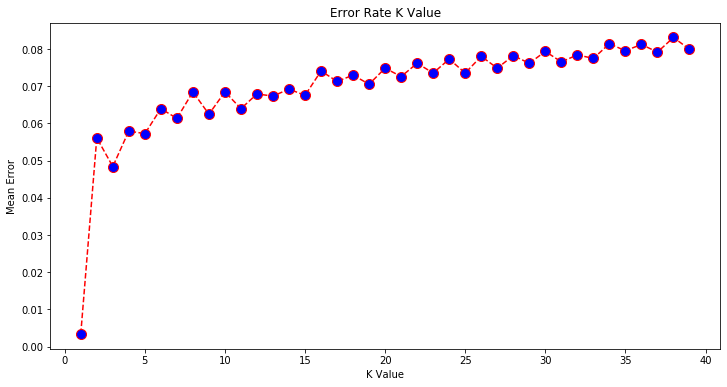

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### SVM

In [820]:
from sklearn import svm

In [821]:
svm_model = svm.SVC(kernel='rbf', C=1e4, gamma=0.01)
svm_model

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [822]:
%time svm_model.fit(X_train, y_train)

CPU times: user 8.87 s, sys: 53.6 ms, total: 8.92 s
Wall time: 8.94 s


SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [823]:
svm_model.score(X_test, y_test)

0.9028021015761821

#### XGBoost

In [116]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

In [117]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [118]:
xgb_model.score(X_test, y_test)

0.9531523642732049

In [119]:
pred_xgb = xgb_model.predict(X_test)
pred_xgb

array([1, 1, 0, ..., 0, 0, 1])

In [120]:
confusion_matrix(y_test, pred_xgb)

array([[1262,   44],
       [  63,  915]])

In [121]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1306
           1       0.95      0.94      0.94       978

   micro avg       0.95      0.95      0.95      2284
   macro avg       0.95      0.95      0.95      2284
weighted avg       0.95      0.95      0.95      2284



In [122]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1832,-0.402936,-0.499112,0.089874,0.706132,1.094243,1.845828,1.218042,1.158484,-0.484488,-0.277124,...,-0.718000,-0.189749,0.269721,-0.001769,0.930709,-0.059501,-1.027315,1.350874,1.386527,1.185804
6390,-0.402936,-0.499112,0.089874,0.706132,-0.030712,0.329776,-0.381019,-0.426339,-0.892316,-0.277124,...,-0.718000,-0.189749,0.269721,-0.843543,0.424639,-0.551873,1.080530,-0.740261,1.386527,1.185804
2345,-0.402936,0.900424,0.089874,-1.416166,1.064639,0.708789,-0.914039,2.743306,-0.076659,-0.277124,...,-0.718000,-0.189749,-0.711352,-0.843543,0.930709,-0.551873,-1.027315,-0.740261,1.386527,-0.843310
2326,-0.402936,-0.499112,0.089874,0.706132,-1.481313,-1.944303,-0.914039,-1.218750,-0.892316,1.245056,...,-0.718000,-0.189749,-0.711352,-0.843543,-1.599641,-1.044246,-1.027315,1.350874,-0.721227,-0.843310
47,-0.402936,-0.499112,0.089874,-1.416166,-1.126064,-0.807264,0.152001,-0.426339,-0.892316,-0.277124,...,-0.718000,-0.189749,-0.711352,-0.843543,-0.587501,0.925243,0.658961,-0.740261,-0.721227,-0.843310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.518250,-0.499112,0.089874,-1.416166,1.005431,1.087802,0.152001,-1.218750,1.554656,-0.277124,...,0.223139,-0.189749,1.250793,0.840005,-0.587501,1.417616,0.237392,-0.740261,1.386527,1.185804
3687,-0.402936,-0.499112,0.089874,0.706132,-0.119525,-0.049237,0.152001,-0.426339,-0.892316,-0.277124,...,-0.718000,-0.189749,0.269721,-0.843543,-1.093571,1.417616,-1.027315,1.350874,1.386527,-0.843310
5959,-0.402936,-0.499112,0.089874,-1.416166,0.975827,0.708789,0.152001,1.158484,-0.484488,5.811596,...,1.164278,-0.189749,-0.711352,-0.001769,0.930709,0.432871,-1.027315,-0.740261,-0.721227,-0.843310
2580,-0.402936,2.299960,0.089874,-1.416166,-0.682003,-0.807264,-0.914039,0.366073,0.331170,-0.277124,...,-0.718000,-0.189749,-0.711352,-0.843543,-0.587501,-0.551873,0.658961,-0.740261,-0.721227,-0.843310


## References

https://www.kaggle.com/c/nlp-getting-started

https://www.kaggle.com/philculliton/nlp-getting-started-tutorial